# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import seaborn as sns
sns.set()

# 1st Stage - Linear Regression with one variable

## Import data from attached scrinshot

In [2]:
X = np.array([8, 9, 8, 7])
y = np.array([5, 9, 7, 3])

## Visualize our basic data

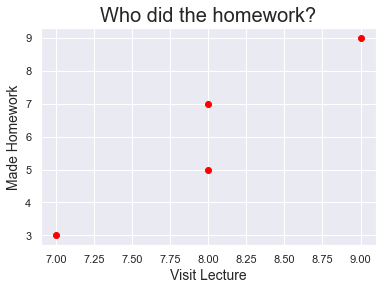

In [3]:
plt.scatter(X, y, color = 'red')
plt.title('Who did the homework?', fontsize = 20)
plt.xlabel('Visit Lecture', fontsize = 14)
plt.ylabel('Made Homework', fontsize = 14)
plt.show()

## Linear regression with scipy.optimize.minimize (manually method)

In [4]:
obj_RMSE = lambda k: sum(((k[1] * X + k[0] - y) ** 2) / len(X))
obj_RMSE_min = minimize(obj_RMSE, [0,0], method='nelder-mead')
obj_RMSE_min.x

array([-18.00002874,   3.00000475])

In [5]:
# linear regression equation = 3*x - 18
hilel_group = 10
obj_RMSE_min.x[1] * hilel_group + obj_RMSE_min.x[0]

12.000018772071485

In [6]:
#We got the result of 12 complete homework assignments with a total of 10 students, which is, of course, incorrect. 
#The main reason for this is a very small and unrepresentative sample of data.

In [7]:
y_pred1 = [obj_RMSE_min.x[1] * i + obj_RMSE_min.x[0] for i in X]
y_pred1

[6.000009270156873, 9.000014021114179, 6.000009270156873, 3.0000045191995675]

## Linear Regression with Sklearn

In [8]:
regressor = LinearRegression()
regressor.fit(X.reshape(-1,1),y)

LinearRegression()

In [9]:
y_pred2 = regressor.predict(X.reshape(-1,1))
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y.reshape(len(y),1)),1))

[[6. 5.]
 [9. 9.]
 [6. 7.]
 [3. 3.]]


In [10]:
from sklearn.metrics import r2_score
r2_score(y, y_pred2)

0.9

In [11]:
#The accuracy of the model came out quite high (about 90%), 
#but with such a small dataset, you should definitely not rely on it 
#(in future we will observe large errors on many test datasets)

In [12]:
X_check = np.array([10])
y_check = regressor.predict(X_check.reshape(-1,1))
y_check

array([12.])

In [13]:
#Target value is similar to the first method

## Visualize both type of Linear Regression

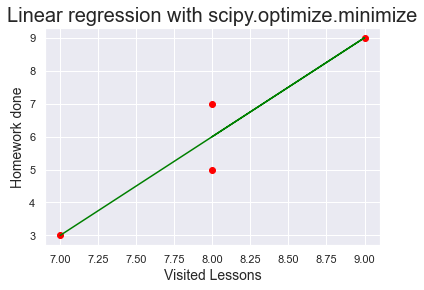

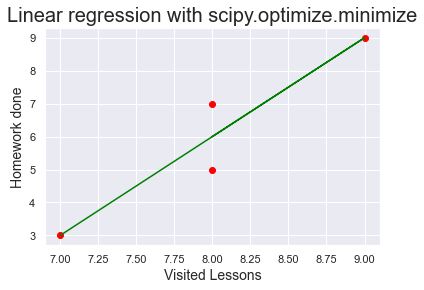

In [14]:
# Visualize Linear regression with scipy.optimize.minimize
plt.scatter(X, y, color = "red")
plt.title("Linear regression with scipy.optimize.minimize", fontsize = 20)
plt.plot(X, y_pred1, color = "green")
plt.xlabel("Visited Lessons", fontsize = 14)
plt.ylabel("Homework done", fontsize = 14)
plt.show()

# Visualize Linear regression with Sklearn
plt.scatter(X, y, color = "red")
plt.title("Linear regression with scipy.optimize.minimize", fontsize = 20)
plt.plot(X, y_pred2, color = "green")
plt.xlabel("Visited Lessons", fontsize = 14)
plt.ylabel("Homework done", fontsize = 14)
plt.show()

In [15]:
#Linear regressions plots are almost identical

## Ridge Linear Regression with different alpha

0.8999777233236801
0.8979591836734694
0.8
0.5759999999999998
0.4408163265306121
0.275


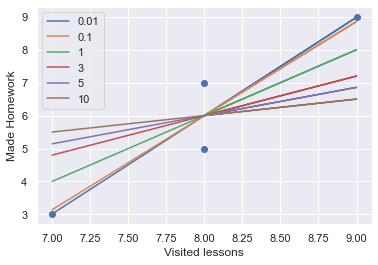

In [16]:
from sklearn.linear_model import Ridge
plt.scatter(X, y)
for i in [0.01, 0.1, 1, 3, 5, 10]:
    regressor_alpha_ridge = Ridge(alpha=i)
    regressor_alpha_ridge.fit(X.reshape(-1,1),y)
    plt.plot(X, [regressor_alpha_ridge.coef_ * i + regressor_alpha_ridge.intercept_ for i in X], label = i)
    print(regressor_alpha_ridge.score(X.reshape(-1,1), y))
plt.xlabel("Visited lessons")
plt.ylabel("Made Homework")
plt.legend()
plt.show()

## Lasso Linear Regression with different alpha

0.89996
0.896
0.8
0.5
0.0


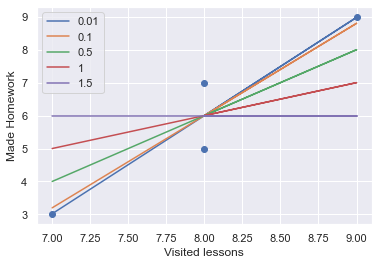

In [17]:
from sklearn.linear_model import Lasso
plt.scatter(X, y)
for i in [0.01, 0.1, 0.5, 1, 1.5]:
    regressor_alpha_lasso = Lasso(alpha=i)
    regressor_alpha_lasso.fit(X.reshape(-1,1),y)
    plt.plot(X, [regressor_alpha_lasso.coef_ * i + regressor_alpha_lasso.intercept_ for i in X], label = i)
    print(regressor_alpha_lasso.score(X.reshape(-1,1), y))
plt.xlabel("Visited lessons")
plt.ylabel("Made Homework")
plt.legend()
plt.show()

In [18]:
# The key difference between Classical Linear Regression and Ridge-Lasso Regression 
# is in how they assign penalty to the coefficients:

# Ridge Regression: Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
# Minimization objective = LS Obj + α * (sum of square of coefficients)

# Lasso Regression: Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
# Minimization objective = LS Obj + α * (sum of absolute value of coefficients)

# Note that here LS Obj refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

# The major advantage of ridge regression is coefficient shrinkage and reducing model complexity.
# Along with shrinking coefficients, lasso performs feature selection as well. 
# Some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

# Ridge: It is majorly used to prevent overfitting. Since it includes all the features, 
# it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.

# Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) 
# for modelling cases where the #features are in millions or more. 
# In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.


# 2nd Stage - Linear Regression with multiple variables

## Import  data

In [19]:
X2 = np.array([[8, 9, 8, 7], [0, 1, 1, 2]])
y2 = np.array([5, 9, 7, 3])
# [0, 1, 1, 2] - it is addition variable - lessons complexity + время на адаптацию как то так прописать
# про сложность прописать

## Multiple Linear regression with scipy.optimize.minimize (manually method)

In [20]:
obj_RMSE2 = lambda m: sum(((m[1] * X2[0] + m[2] * X2[1] + m[0] - y2) ** 2) / len(X2))
obj_RMSE_min2 = minimize(obj_RMSE2, [0,0,0])
obj_RMSE_min2.x

array([-21.33332373,   3.3333322 ,   0.66666613])

In [21]:
# linear regression equation = 3.33*x1 + 0.67*x2 - 21
# Class attendance is a more significant variable than class difficulty (3.33 > 0.67)
hilel_group2, complexity = 10 , 1
obj_RMSE_min2.x[1] * hilel_group2 + obj_RMSE_min2.x[2] * complexity + obj_RMSE_min2.x[0]

12.666664378412396

In [22]:
# We got a result almost the same as with one variable - 13 complete homework assignments with 10 students, which, of course, is not true.
# The main reason for this is the same - a very small and unrepresentative sample of data.
# Inclusion of an additional variable (difficulty) did not have a significant impact on the result

## Multiple Linear Regression with Sklearn

In [23]:
X3 = np.array([[8, 9, 8, 7], [0, 1, 1, 2]])
y3 = np.array([5, 9, 7, 3])

In [24]:
X3.reshape(4,2)

array([[8, 9],
       [8, 7],
       [0, 1],
       [1, 2]])

In [25]:
regressor_multiple = LinearRegression()
regressor_multiple.fit(X3.reshape(4,2), y3)

LinearRegression()

In [26]:
y_pred3 = regressor_multiple.predict(X3.reshape(4,2))
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y3.reshape(len(y3),1)),1))

[[4.73684211 5.        ]
 [9.         9.        ]
 [5.15789474 7.        ]
 [5.10526316 3.        ]]


In [27]:
r2_score(y3, y_pred3)

0.6052631578947367

In [28]:
#The accuracy of the model has decreased to 60%. The main reason is the very small dataset to train the model to understand 
#the true relationships between the selected variables and the target.

## Ridge Multiple Linear Regression with different alpha

In [29]:
for i in [0.01, 0.1, 1, 3, 5, 10]:
    regressor_multiple_alpha_ridge = Ridge(alpha=i)
    regressor_multiple_alpha_ridge.fit(X3.reshape(4,2),y3)
    y_pred3_ridge = regressor_multiple_alpha_ridge.predict(X3.reshape(4,2))
    print(r2_score(y3, y_pred3_ridge))

0.6052248977491711
0.6019740867391757
0.49513624799321543
0.3408679593721142
0.27145932437678266
0.1993265542977184


In [30]:
#The accuracy of the models has decreased. Conclusions are similar to those 
#for conventional linear regression with two variables.

## Lasso Multiple Linear Regression with different alpha

In [31]:
for i in [0.01, 0.1, 0.5, 1, 1.5]:
    regressor_multiple_alpha_lasso = Lasso(alpha=i)
    regressor_multiple_alpha_lasso.fit(X3.reshape(4,2),y3)
    y_pred3_lasso = regressor_multiple_alpha_lasso.predict(X3.reshape(4,2))
    print(r2_score(y3, y_pred3_lasso))

0.6051209196265965
0.5911919226448412
0.25405253201594946
0.13480176211453743
0.11718061674008806


In [32]:
#The accuracy of the models has decreased. Conclusions are similar to those 
#for conventional linear regression with two variables.

# 3rd Stage - Optional task - Function Algebra

In [34]:
class Function: 

    def __init__(self, f, df):
        self.f = f
        self.df = df
        
    def __call__(self, x, grad = False):
        if grad:
            return self.df(x)
        else:
            return self.f(x)
        
    def __add__(self, another):
        return Function(
            lambda x: self.f(x) + another.f(x),
            lambda x: self.df(x) + another.df(x))
    
    def __sub__(self, another):
        return Function(
            lambda x: self.f(x) - another.f(x),
            lambda x: self.df(x) - another.df(x))
    
    def __mul__(self, another):
        return Function(
            lambda x: self.f(x) * another.f(x),
            lambda x: self.f(x) * another.df(x) + self.df(x) * another.f(x))
    
    def __truediv__(self, another):
        return Function(
            lambda x: self.f(x) / another.f(x),
            lambda x: self.df(x) / another.f(x) - self.f(x) * another.df(x) / another.f(x)**2)
    
    def __matmul__(self, another):
        return Function(
            lambda x: self.f(another.f(x)),
            lambda x: self.df(another.f(x)) * another.df(x))